# Abstract

In [ ]:
# PMML
!pip install sklearn2pmml

# ONNX
!pip install skl2onnx
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.3 MB/s eta 0:00:00
  Created wheel for sklearn2pmml: filename=sklearn2pmml-0.95.1-py3-none-any.whl size=6519497 sha256=5a388da830e07a70f51b9217d3ad377ae85bd147871e7ce8ec5458a23bac423b
  Stored in directory: /root/.cache/pip/wheels/28/6b/ac/a459b95adfc92edb2500690bf714250b3e2b67e7dfa8fb6fbb
Successfully built sklearn2pmml
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.3/292.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import preprocessing, metrics

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import data to df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/422 Project/data_public.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', na_values='?')
labels = ['A', 'B','C','D','E','F','G','H','I','J','K','L','M','N','O']

In [ ]:
# get some initial information about the dataset
# show first few rows
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [ ]:
# datatypes, missing values, number of items, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 16 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   A       1200000 non-null  float64
 1   B       1200000 non-null  float64
 2   C       1200000 non-null  float64
 3   D       1200000 non-null  float64
 4   E       1200000 non-null  float64
 5   F       1200000 non-null  float64
 6   G       1200000 non-null  float64
 7   H       1200000 non-null  float64
 8   I       1200000 non-null  float64
 9   J       1200000 non-null  float64
 10  K       1200000 non-null  float64
 11  L       1200000 non-null  float64
 12  M       1200000 non-null  float64
 13  N       1200000 non-null  float64
 14  O       1200000 non-null  float64
 15  Class   1200000 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 146.5 MB


In [ ]:
df.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,5.068656e+01,-1.883373e+01,7.162152e+01,-1.355120e+01,2.944177e+01,-6.185189e+00,3.174186e+01,5.112504e+01,3.300077e+01,4.092546e+01,7.938340e+01,-6.746540e+00,-4.232290e+01,4.949012e+01,5.980333e+01,2.167323e+00
std,1.292492e+02,1.446355e+01,1.052808e+02,4.689774e+01,7.282278e+01,7.309100e+01,6.660329e+01,1.034053e+02,4.217119e+01,7.694386e+01,9.484003e+01,1.557490e+01,1.791142e+01,6.728231e+01,6.677712e+01,6.874930e-01
min,-7.308940e+01,-8.322357e+01,-5.972853e+01,-1.375818e+02,-3.829826e+01,-1.485917e+02,-6.654137e+01,-4.246089e+01,-1.818542e+01,-1.123844e+02,-1.415233e+01,-6.271828e+01,-8.144988e+01,-2.057979e+01,-1.283059e+01,1.000000e+00
25%,-3.793679e+01,-1.786669e+01,7.553164e+00,-1.471337e+01,-2.436286e+01,-3.072492e+01,-3.484185e+00,-2.629661e+01,-7.594991e+00,2.108044e+01,2.419273e+00,-8.875128e+00,-5.567326e+01,-7.131906e+00,1.628438e-01,2.000000e+00
50%,-3.197847e+01,-1.369876e+01,1.348796e+01,-8.004308e+00,-1.897058e+01,-2.475391e+01,1.491431e+00,-1.817028e+01,3.769369e+01,2.717432e+01,2.652955e+01,-1.079123e+00,-5.297585e+01,1.462293e+01,4.689262e+01,2.000000e+00
75%,2.280020e+02,-1.055606e+01,2.123439e+02,1.955806e+01,1.289018e+02,7.834417e+01,1.151840e+02,1.915891e+02,7.984842e+01,1.253846e+02,2.046458e+02,3.334451e+00,-2.208504e+01,1.363603e+02,1.451293e+02,3.000000e+00
max,2.687738e+02,4.460108e+00,2.561698e+02,3.263799e+01,1.579843e+02,1.229186e+02,1.660534e+02,2.329496e+02,1.112970e+02,1.755397e+02,2.598003e+02,2.159496e+01,1.032828e+01,1.789303e+02,1.807011e+02,3.000000e+00


In [ ]:
# scale df to remove sparsity
df_scaled = pd.DataFrame(data=preprocessing.scale(df), columns=df.columns)

# class column is not continuous, put back original
df_scaled['Class'] = df['Class']
df_scaled.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,1.398333,0.457892,1.386800,-0.043941,1.518831,1.136805,1.499176,1.421937,1.182621,1.123217,1.531100,0.048383,1.542774,1.390885,1.402222,2
1,-0.686316,0.320671,-0.589262,0.764323,-0.755534,-0.166762,-0.477999,-0.820431,-0.980689,-0.222670,-0.792750,0.613532,-0.949550,-0.909245,-0.875843,3
2,-0.695429,-0.109594,-0.480605,0.710940,-0.759987,-0.177913,-0.520931,-0.739075,-0.939343,-0.190270,-0.774695,0.830704,-0.815240,-0.805046,-0.910959,2
3,1.322591,0.902156,1.378256,0.077838,1.336854,1.249231,1.157837,1.416902,1.175193,1.509929,1.408750,0.200674,1.499253,1.274864,1.338920,2
4,1.376193,0.441525,1.263438,0.005832,1.503497,1.331041,1.259054,1.529661,1.350708,1.161552,1.290718,0.332113,1.518267,1.469607,1.313165,3


In [ ]:
# suppress scientific notation
df_scaled.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,1200000.00000,1200000.00000,1200000.00000,1200000.00000,1200000.00000,1200000.00000,1200000.00000,1200000.00000,1200000.00000,1200000.00000,1200000.00000,1200000.00000,1200000.00000,1200000.00000,1200000.00000,1200000.00000
mean,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,2.16732
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.68749
min,-0.95765,-4.45187,-1.24762,-2.64471,-0.93020,-1.94835,-1.47565,-0.90504,-1.21377,-1.99249,-0.98625,-3.59372,-2.18447,-1.04143,-1.08771,1.00000
25%,-0.68568,0.06686,-0.60855,-0.02478,-0.73884,-0.33574,-0.52889,-0.74872,-0.96264,-0.25792,-0.81152,-0.13667,-0.74536,-0.84156,-0.89313,2.00000
50%,-0.63958,0.35503,-0.55218,0.11828,-0.66480,-0.25405,-0.45419,-0.67013,0.11128,-0.17872,-0.55729,0.36388,-0.59476,-0.51822,-0.19334,2.00000
75%,1.37189,0.57231,1.33664,0.70599,1.36578,1.15650,1.25282,1.35838,1.11089,1.09767,1.32078,0.64726,1.12989,1.29113,1.27777,3.00000
max,1.68734,1.61052,1.75292,0.98489,1.76514,1.76634,2.01659,1.75837,1.85663,1.74951,1.90233,1.81969,2.93953,1.92384,1.81047,3.00000


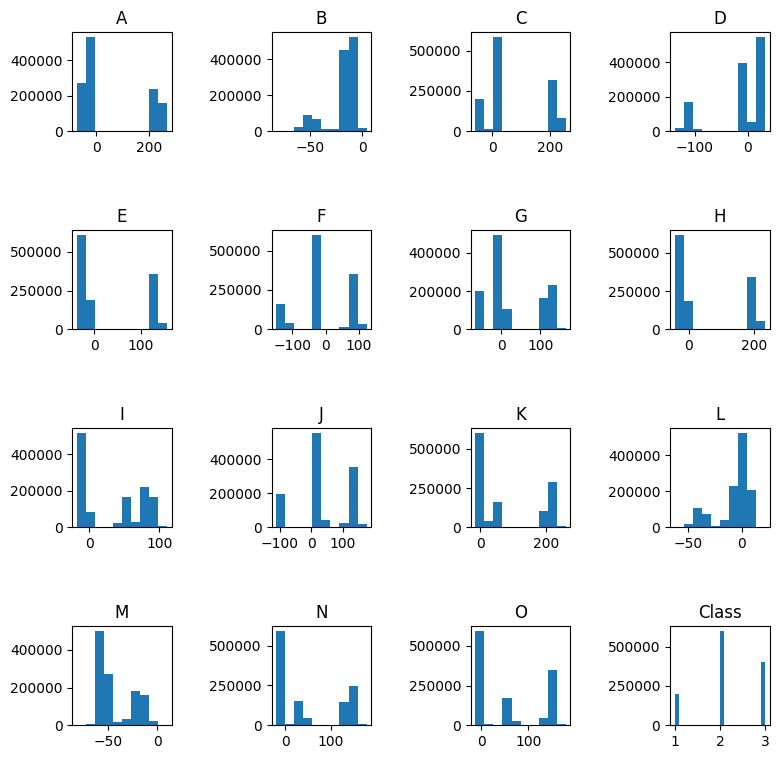

In [ ]:
""" Exploratory analysis """

# Histograms of each feature using the method from the example project file
features = 'ABCDEFGHIJKLMNO'
plot = plt.figure()

for i in range(1,16):
    plot.add_subplot(4,4,i)
    plt.hist(df[features[i-1:i]], bins=20)
    plt.title(features[i-1:i])

plot.add_subplot(4,4,16)
plt.hist(df['Class'], bins=20)
plt.title('Class')
plot.subplots_adjust(hspace=1, wspace=1)
plot.set_figheight(9)
plot.set_figwidth(9)



In [ ]:
# Heatmap


In [ ]:
# split into training and testing data
x = pd.DataFrame(data=df.drop('Class', axis=1), columns=labels)
y = pd.DataFrame(data=df['Class'], columns=['Class'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
training_data = pd.concat([x_train, y_train], axis=1)
training_data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
629157,249.000092,-9.090282,211.209634,-15.235912,138.656702,101.882182,117.387828,192.034472,81.020254,154.204300,206.292871,0.257233,-11.684402,152.111833,153.850614,2
122759,231.829913,-14.382071,211.095078,-13.413375,131.250716,71.773459,118.088274,201.512259,81.614745,127.933812,216.031744,-5.405456,-19.723260,146.226789,155.026696,2
1086080,-56.685039,-50.649438,-36.300903,-114.599648,-7.594371,-126.302727,-53.413664,-0.213477,58.851970,-103.335890,48.727386,-49.524090,-43.497169,36.741346,50.994903,2
772997,-34.454897,-16.427577,7.671695,17.317625,-22.970630,-30.272291,-0.582984,-21.567135,-8.360163,26.396238,4.859799,3.199202,-56.915664,-8.483267,0.413739,2
296895,225.181508,-13.112148,221.495831,-12.786859,133.039832,69.369864,121.418059,184.027051,81.312711,131.284684,210.216918,-10.203818,-18.459982,141.057619,149.710662,2


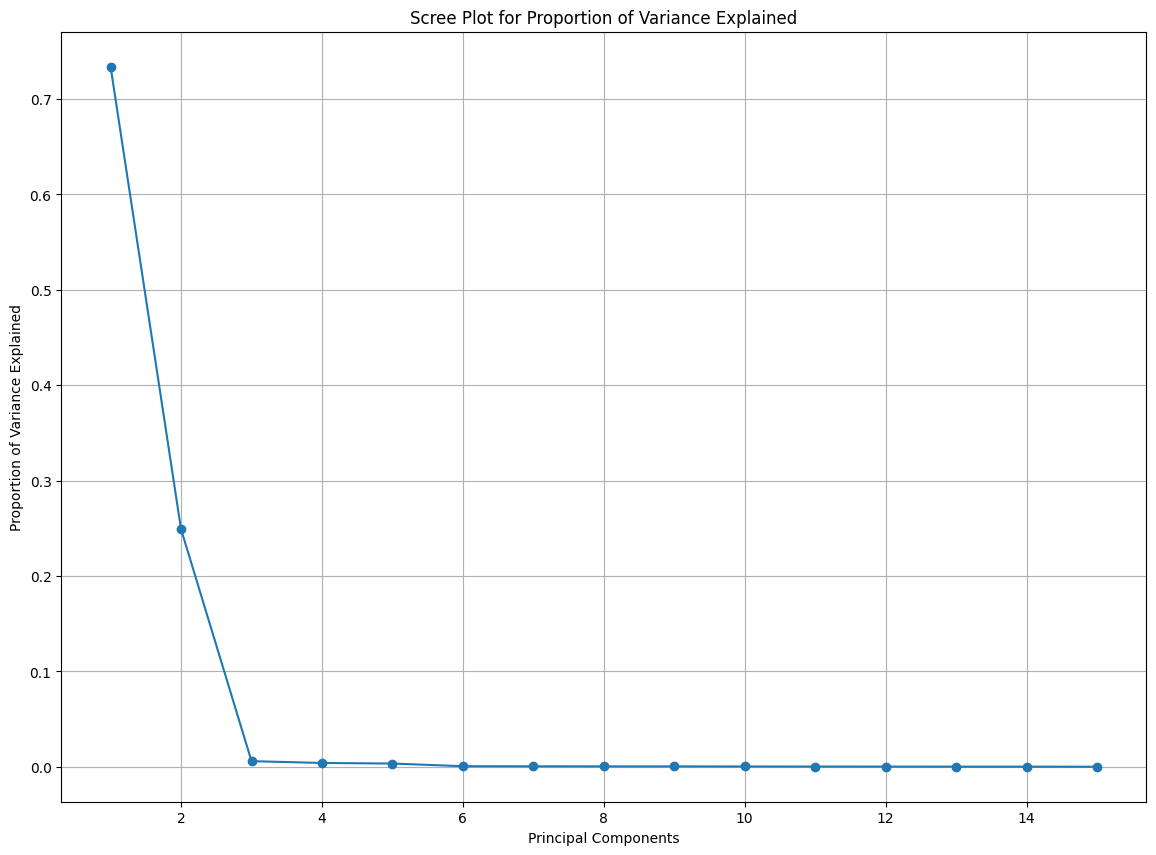

In [ ]:
"""
Similar to the example project file,
I used a scree plot to identify the optimal number of principal components.
The code can be found here: https://statisticsglobe.com/scree-plot-pca-python
"""

# scale dataset
sc = StandardScaler()
df_scaled = sc.fit_transform(df.drop('Class', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=labels)
df_scaled = pd.concat([df_scaled, df['Class']], axis=1)

# PCA - dimensionality reduction
pca = PCA(n_components=15)
pca.fit(df_scaled.drop('Class', axis=1))

eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)

plt.figure(figsize=(14,10))
plt.plot(np.arange(1, len(prop_var)+1), prop_var, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot for Proportion of Variance Explained')
plt.grid(True)

The elbow occurs at n=3, indicating 3 is the optimal number of dimensions.

In [ ]:
# K-means clustering